In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path to your uploaded NBIA download folder
dicom_dir = '/content/drive/MyDrive/UPENN_GBM_Top10'

# Path where converted NIfTI files will go
nifti_output_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install dicom2nifti pydicom nibabel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.2 MB/s eta 0:00:00


In [ ]:
import dicom2nifti
import os
import pydicom

def clean_modality_name(name):
    name = name.upper()
    if 'FLAIR' in name:
        return 'FLAIR'
    if 'T1' in name and ('C' in name or 'CE' in name or 'POST' in name):
        return 'T1CE'
    if 'T1' in name:
        return 'T1'
    if 'T2' in name:
        return 'T2'
    if 'ADC' in name:
        return 'ADC'
    if 'DWI' in name:
        return 'DWI'
    if 'MRS' in name or 'SPECTRO' in name:
        return 'MRS'
    return 'UNKNOWN'

# ✅ Corrected path
base_dir = '/content/drive/MyDrive/UPENN_GBM_Top10/manifest-1669766397961/UPENN-GBM'
output_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
os.makedirs(output_dir, exist_ok=True)

for patient in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient)
    if not os.path.isdir(patient_path):
        continue

    for series_folder in os.listdir(patient_path):
        series_path = os.path.join(patient_path, series_folder)
        if not os.path.isdir(series_path):
            continue

        for sub in os.listdir(series_path):
            sub_path = os.path.join(series_path, sub)
            if not os.path.isdir(sub_path):
                continue

            try:
                dicom_files = [f for f in os.listdir(sub_path) if f.endswith('.dcm')]
                if not dicom_files:
                    continue

                dcm_sample = pydicom.dcmread(os.path.join(sub_path, dicom_files[0]), stop_before_pixels=True)
                modality = clean_modality_name(str(dcm_sample.SeriesDescription))

                nifti_filename = f"{patient}_{modality}_{sub}.nii.gz"
                output_path = os.path.join(output_dir, nifti_filename)

                dicom2nifti.convert_directory(sub_path, output_dir, compression=True, reorient=True)
                print(f"✅ Converted: {patient}/{sub} → {modality}")

            except Exception as e:
                print(f"❌ Failed to convert {sub_path}: {e}")


✅ Converted: UPENN-GBM-00302/16.000000-t1 axial stealth-post  ProcessedCaPTk-56405 → T1CE
✅ Converted: UPENN-GBM-00302/32.000000-PERFUSION BOLUS-66593 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00302/7.000000-MDDW DTI AXIAL 30 DIRECTION-09457 → UNKNOWN
✅ Converted: UPENN-GBM-00302/4.000000-T2 AXIAL ProcessedCaPTk-09394 → T2
✅ Converted: UPENN-GBM-00302/3.000000-t1 axial ProcessedCaPTk-99374 → T1CE
✅ Converted: UPENN-GBM-00302/33.000000-AX T1 3D POST STEALTH  ProcessedCaPTk-61828 → T1CE
✅ Converted: UPENN-GBM-00302/15.000000-ep2dperf BOLUS-72584 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00302/6.000000-ep2dDTI30dir-58741 → UNKNOWN
✅ Converted: UPENN-GBM-00302/14.000000-t2Flairaxial ProcessedCaPTk-10551 → FLAIR
✅ Converted: UPENN-GBM-00302/4.000000-Axial T2 tse ProcessedCaPTk-55250 → T2
✅ Converted: UPENN-GBM-00302/31.000000-T2 AXIAL FLAIR ProcessedCaPTk-78479 → FLAIR
✅ Converted: UPENN-GBM-00302/3.000000-AX T1 3D PRE ProcessedCaPTk-46619 → T1CE
✅ Converted: UPENN-GBM-00130/36.000000-T2 AXIAL FLAIR POST  ProcessedCaPTk-48410 → FLAIR
✅ Converted: UPENN-GBM-00130/14.000000-ep2dperf BOLUS-26749 → UNKNOWN
✅ Converted: UPENN-GBM-00130/8.000000-AX T1 MPRAGE ISOTROPIC ProcessedCaPTk-13558 → T1CE
✅ Converted: UPENN-GBM-00130/3.000000-AX T2  ProcessedCaPTk-86967 → T2
✅ Converted: UPENN-GBM-00130/34.000000-T2 AXIAL ProcessedCaPTk-73837 → T2
✅ Converted: UPENN-GBM-00130/6.000000-AX T1 PRE  ProcessedCaPTk-25517 → T1CE
✅ Converted: UPENN-GBM-00130/3.000000-AX T1 3D PRE ProcessedCaPTk-34202 → T1CE
✅ Converted: UPENN-GBM-00130/37.000000-AX T1 3D POST STEALTH  Pr

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00130/27.000000-MDDW DTI AXIAL 30 DIRECTION-69698 → UNKNOWN
✅ Converted: UPENN-GBM-00130/7.000000-AX FLAIR ProcessedCaPTk-81456 → FLAIR
✅ Converted: UPENN-GBM-00280/7.000000-AX T1 PRE  ProcessedCaPTk-52423 → T1CE
✅ Converted: UPENN-GBM-00280/45.000000-PERFUSION BOLUS-43638 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00280/36.000000-MDDW DTI AXIAL 30 DIRECTION-81277 → UNKNOWN
✅ Converted: UPENN-GBM-00280/44.000000-T2 AXIAL FLAIR ProcessedCaPTk-37693 → FLAIR
✅ Converted: UPENN-GBM-00280/3.000000-AX T2  ProcessedCaPTk-46774 → T2
✅ Converted: UPENN-GBM-00280/46.000000-AX T1 3D POST STEALTH  ProcessedCaPTk-37500 → T1CE
✅ Converted: UPENN-GBM-00280/8.000000-AXIAL FLAIR  ProcessedCaPTk-34014 → FLAIR
✅ Converted: UPENN-GBM-00280/34.000000-T2 AXIAL ProcessedCaPTk-37990 → T2
✅ Converted: UPENN-GBM-00280/9.000000-AX T1 MPRAGE ISOTROPIC ProcessedCaPTk-13577 → T1CE
✅ Converted: UPENN-GBM-00280/2.000000-T1 MPRAGE AXIAL IPAT ProcessedCaPTk-74418 → T1CE
✅ Converted: UPENN-GBM-00183/4.000000-t1 axial stealth-post  ProcessedCaPTk-79645 → T1CE
✅ Converted: UPENN-GBM-00183/2.000000-t2Flairaxial ProcessedCaPTk-31249 → FLAIR
✅ Converted: UPENN-GBM-00183/3.000000-ep2dperf 12 CC BOLUS-48339 → UNKNOWN
✅ Converted: UPENN-GBM-00183/4.000000-Axial T2 tse ProcessedCaPTk-79130 → T2
✅ Converted: UPENN-GBM

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00183/6.000000-ep2dDTI30dir-05655 → UNKNOWN
✅ Converted: UPENN-GBM-00183/15.000000-ep2dperf BOLUS-30603 → UNKNOWN
✅ Converted: UPENN-GBM-00183/13.000000-t2Flairaxial ProcessedCaPTk-70023 → FLAIR
✅ Converted: UPENN-GBM-00183/16.000000-t1 axial stealth-post  ProcessedCaPTk-83907 → T1CE


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00183/6.000000-ep2dDTI30dir-91084 → UNKNOWN
✅ Converted: UPENN-GBM-00183/4.000000-Axial T2 tse ProcessedCaPTk-04943 → T2
✅ Converted: UPENN-GBM-00314/42.000000-AX T1 3D POST STEALTH  ProcessedCaPTk-89697 → T1CE
✅ Converted: UPENN-GBM-00314/3.000000-AX T1 3D PRE ProcessedCaPTk-83452 → T1CE
✅ Converted: UPENN-GBM-00314/11.000000-AXIAL T2 FLAIR ProcessedCaPTk-38455 → FLAIR


✅ Converted: UPENN-GBM-00314/40.000000-T2 AXIAL FLAIR ProcessedCaPTk-89595 → FLAIR
✅ Converted: UPENN-GBM-00314/13.000000-T1 MPRAGE AX ProcessedCaPTk-52963 → T1CE
✅ Converted: UPENN-GBM-00314/41.000000-PERFUSION BOLUS-47360 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00314/7.000000-MDDW DTI AXIAL 30 DIRECTION-79231 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00314/4.000000-DTI-18972 → UNKNOWN


/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py:282: RuntimeWarning: invalid value encountered in divide
  current_direction = current_direction / numpy.linalg.norm(current_direction)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 76, in dicom_to_nifti
    return _classic_4d_to_nifti(grouped_dicoms, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 214, in 

✅ Converted: UPENN-GBM-00314/12.000000-PERFUSION-68717 → UNKNOWN
✅ Converted: UPENN-GBM-00314/2.000000-AX TI 3D MPRAGE  ProcessedCaPTk-32716 → UNKNOWN
✅ Converted: UPENN-GBM-00314/4.000000-T2 AXIAL ProcessedCaPTk-71528 → T2
✅ Converted: UPENN-GBM-00314/3.000000-T2 AXIAL ProcessedCaPTk-85953 → T2
✅ Converted: UPENN-GBM-00332/12.000000-t2Flairaxial ProcessedCaPTk-10409 → FLAIR
✅ Converted: UPENN-GBM-00332/46.000000-PERFUSION BOLUS-40393 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00332/38.000000-MDDW DTI AXIAL 30 DIRECTION-34462 → UNKNOWN
✅ Converted: UPENN-GBM-00332/2.000000-T1 MPRAGE AXIAL IPAT ProcessedCaPTk-36040 → T1CE
✅ Converted: UPENN-GBM-00332/3.000000-Axial T2 tse ProcessedCaPTk-25571 → T2
✅ Converted: UPENN-GBM-00332/14.000000-t1 axial stealth-post  ProcessedCaPTk-64387 → T1CE
✅ Converted: UPENN-GBM-00332/2.000000-t1 axial ProcessedCaPTk-53283 → T1CE


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00332/4.000000-ep2dDTI30dir-80330 → UNKNOWN
✅ Converted: UPENN-GBM-00332/13.000000-ep2dperf BOLUS-80875 → UNKNOWN
✅ Converted: UPENN-GBM-00332/45.000000-T2 AXIAL FLAIR ProcessedCaPTk-26314 → FLAIR
✅ Converted: UPENN-GBM-00332/48.000000-AX T1 3D POST STEALTH  ProcessedCaPTk-58274 → T1CE
✅ Converted: UPENN-GBM-00332/36.000000-T2 AXIAL ProcessedCaPTk-38449 → T2
✅ Converted: UPENN-GBM-00160/15.000000-t1 axial stealth-post  ProcessedCaPTk-43012 → T1CE
✅ Converted: UPENN-GBM-00160/13.000000-t2Flairaxial ProcessedCaPTk-87327 → FLAIR
✅ Converted: UPENN-GBM-00160/4.000000-Axial T2 tse ProcessedCaPTk-85932 → T2
✅ Converted: UPENN-GBM-00160/36.000000-PERFUSION BOLUS-55755 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00160/28.000000-MDDW DTI AXIAL 30 DIRECTION-66588 → UNKNOWN
✅ Converted: UPENN-GBM-00160/3.000000-t1 axial ProcessedCaPTk-14396 → T1CE


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00160/6.000000-ep2dDTI30dir-17946 → UNKNOWN
✅ Converted: UPENN-GBM-00160/25.000000-T2 AXIAL ProcessedCaPTk-64934 → T2
✅ Converted: UPENN-GBM-00160/37.000000-AX T1 3D POST STEALTH  ProcessedCaPTk-69862 → T1CE
✅ Converted: UPENN-GBM-00160/2.000000-T1 MPRAGE AXIAL IPAT ProcessedCaPTk-49155 → T1CE
✅ Converted: UPENN-GBM-00160/35.000000-T2 AXIAL FLAIR ProcessedCaPTk-37652 → FLAIR
✅ Converted: UPENN-GBM-00197/14.000000-t2Flairaxial ProcessedCaPTk-49432 → FLAIR
✅ Converted: UPENN-GBM-00197/3.000000-Axial T2 tse ProcessedCaPTk-47897 → T2


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00197/4.000000-ep2dDTI30dir-53537 → UNKNOWN
✅ Converted: UPENN-GBM-00197/13.000000-ep2dperf BOLUS-40689 → UNKNOWN
✅ Converted: UPENN-GBM-00197/16.000000-t1 axial stealth-post  ProcessedCaPTk-90375 → T1CE


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00197/7.000000-ep2dDTI30dir-20401 → UNKNOWN
✅ Converted: UPENN-GBM-00197/3.000000-t1 axial ProcessedCaPTk-31008 → T1CE
✅ Converted: UPENN-GBM-00197/6.000000-Axial T2 tse ProcessedCaPTk-88251 → T2
✅ Converted: UPENN-GBM-00197/14.000000-t1 axial stealth-post  ProcessedCaPTk-89352 → T1CE
✅ Converted: UPENN-GBM-00197/2.000000-t1 axial ProcessedCaPTk-72818 → T1CE
✅ Converted: UPENN-GBM-00197/12.000000-t2Flairaxial ProcessedCaPTk-37443 → FLAIR
✅ Converted: UPENN-GBM-00344/15.000000-t1 axial stealth-post  ProcessedCaPTk-05594 → T1CE
✅ Converted: UPENN-GBM-00344/15.000000-t1 axial stealth-post  ProcessedCaPTk-12672 → T1CE


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00344/6.000000-ep2dDTI30dir-73933 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00344/5.000000-ep2dDTI30dir-25564 → UNKNOWN
✅ Converted: UPENN-GBM-00344/14.000000-ep2dperf BOLUS-82411 → UNKNOWN
✅ Converted: UPENN-GBM-00344/3.000000-Axial T2 tse ProcessedCaPTk-93335 → T2
✅ Converted: UPENN-GBM-00344/3.000000-t1 axial ProcessedCaPTk-67800 → T1CE
✅ Converted: UPENN-GBM-00344/13.000000-t2Flairaxial ProcessedCaPTk-52481 → FLAIR
✅ Converted: UPENN-GBM-00344/2.000000-t1 axial ProcessedCaPTk-30671 → T1CE
✅ Converted: UPENN-GBM-00344/4.000000-Axial T2 tse ProcessedCaPTk-78914 → T2
✅ Converted: UPENN-GBM-00344/13.000000-t2Flairaxial ProcessedCaPTk-91604 → FLAIR
✅ Converted: UPENN-GBM-00036/4.000000-Axial T2 tse ProcessedCaPTk-78870 → T2
✅ Converted: UPENN-GBM-00036/15.000000-t1 axial stealth-post  ProcessedCaPTk-26131 → T1CE
✅ Converted: UPENN-GBM-00036/14.000000-ep2dperf 12 CC BOLUS-75916 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00036/6.000000-ep2dDTI30dir-42124 → UNKNOWN
✅ Converted: UPENN-GBM-00036/14.000000-ep2dperf BOLUS-40443 → UNKNOWN


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 121, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 67, in dicom_to_nifti
    return _mosaic_4d_to_nifti(dicom_input, output_file)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", line 159, in _mosaic_4d_to_nifti
    full_block = _mosaic_get_full_block(sorted_mosaics)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_siemens.py", li

✅ Converted: UPENN-GBM-00036/6.000000-ep2dDTI30dir-92948 → UNKNOWN
✅ Converted: UPENN-GBM-00036/3.000000-t1 axial ProcessedCaPTk-71307 → T1CE
✅ Converted: UPENN-GBM-00036/4.000000-Axial T2 tse ProcessedCaPTk-15559 → T2
✅ Converted: UPENN-GBM-00036/15.000000-t1 axial stealth-post  ProcessedCaPTk-47953 → T1CE
✅ Converted: UPENN-GBM-00036/2.000000-t1 axial ProcessedCaPTk-64456 → T1CE
✅ Converted: UPENN-GBM-00036/13.000000-t2Flairaxial ProcessedCaPTk-28022 → FLAIR
✅ Converted: UPENN-GBM-00036/13.000000-t2Flairaxial ProcessedCaPTk-59533 → FLAIR


In [ ]:
import os

nifti_output_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'

files = sorted([f for f in os.listdir(nifti_output_dir) if f.endswith('.nii.gz')])

print(f"🧠 Total NIfTI files: {len(files)}")
print("\n".join(files[:10]))  # Show first 10 files


🧠 Total NIfTI files: 51
11_axial_t2_flair_processed_captk.nii.gz
12_t2_flair_axial_processed_captk.nii.gz
13_ep2d_perf_bolus.nii.gz
13_t1_mprage_ax_processed_captk.nii.gz
13_t2_flair_axial_processed_captk.nii.gz
14_ep2d_perf_12_cc_bolus.nii.gz
14_ep2d_perf_bolus.nii.gz
14_t1_axial_stealth-post__processed_captk.nii.gz
14_t2_flair_axial_processed_captk.nii.gz
15_ep2d_perf_bolus.nii.gz


In [ ]:
import os
from collections import defaultdict

nifti_output_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
key_modalities = {"T1", "T1CE", "T2"}

patient_modalities = defaultdict(set)

def identify_modality(name):
    name = name.upper()
    if 'FLAIR' in name:
        return 'FLAIR'
    if 'T1' in name and ('C' in name or 'CE' in name or 'POST' in name or 'STEALTH' in name):
        return 'T1CE'
    if 'T1' in name:
        return 'T1'
    if 'T2' in name:
        return 'T2'
    return 'UNKNOWN'

# Parse all .nii.gz files
for fname in os.listdir(nifti_output_dir):
    if not fname.endswith('.nii.gz'):
        continue
    parts = fname.split('_')
    patient_id = parts[0]
    modality = identify_modality(fname)
    if modality in key_modalities:
        patient_modalities[patient_id].add(modality)

# Keep patients with at least 2 modalities
selected_patients = []
for pid, mods in patient_modalities.items():
    if len(mods) >= 2:
        selected_patients.append((pid, sorted(mods)))

# Output result
print(f"\n✅ Found {len(selected_patients)} patients with at least 2 key modalities:\n")
for pid, mods in selected_patients:
    print(f"🧠 Patient {pid}: {mods}")



✅ Found 3 patients with at least 2 key modalities:

🧠 Patient 6: ['T1CE', 'T2']
🧠 Patient 3: ['T1CE', 'T2']
🧠 Patient 4: ['T1CE', 'T2']


✅ Loaded Patient 36
✅ Loaded Patient 4
✅ Loaded Patient 14


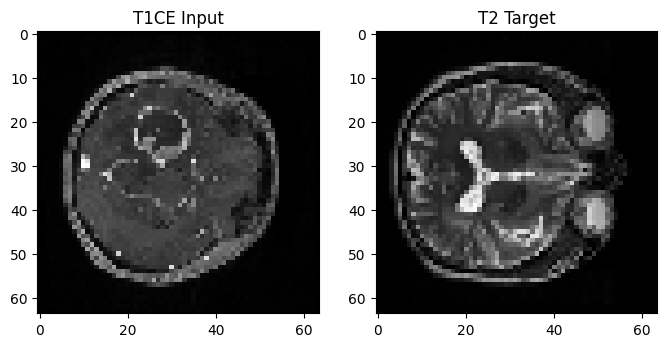

In [ ]:
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split
from collections import defaultdict

# NIfTI file directory
nifti_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
TARGET_SHAPE = (64, 64, 32)

def identify_modality(filename):
    name = filename.lower()
    if 'stealth' in name or 'post' in name:
        return 'T1CE'
    if 't1' in name:
        return 'T1'
    if 't2' in name:
        return 'T2'
    return 'UNKNOWN'

def load_nifti(path):
    img = nib.load(path).get_fdata()
    img = np.nan_to_num(img)
    return (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-5)

def resize_volume(img, target_shape=TARGET_SHAPE):
    zoom_factors = [t/s for t, s in zip(target_shape, img.shape)]
    return zoom(img, zoom_factors, order=1)

# Group modalities per patient
patient_files = defaultdict(dict)

for fname in os.listdir(nifti_dir):
    if not fname.endswith('.nii.gz'):
        continue
    patient_id = fname.split('_')[0]  # e.g., '14'
    modality = identify_modality(fname)
    if modality in ['T1CE', 'T2']:
        patient_files[patient_id][modality] = os.path.join(nifti_dir, fname)

# Load patients that have both T1CE and T2
X, Y = [], []

for pid, modalities in patient_files.items():
    if 'T1CE' in modalities and 'T2' in modalities:
        try:
            t1ce = resize_volume(load_nifti(modalities['T1CE']))
            t2 = resize_volume(load_nifti(modalities['T2']))
            X.append(t1ce[..., np.newaxis])  # Add channel dim
            Y.append(t2[..., np.newaxis])
            print(f"✅ Loaded Patient {pid}")
        except Exception as e:
            print(f"❌ Error loading {pid}: {e}")

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)

# Check and split
if len(X) == 0:
    raise ValueError("❌ No patients found with both T1CE and T2 modalities.")

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(10).batch(1)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(1)

# ✅ Visualize a sample
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("T1CE Input")
plt.imshow(X_train[0][:, :, 16, 0], cmap='gray')  # use middle slice index 16

plt.subplot(1, 2, 2)
plt.title("T2 Target")
plt.imshow(Y_train[0][:, :, 16, 0], cmap='gray')
plt.show()


In [ ]:
from tensorflow.keras import layers, models

def build_mini_cnn_3d_fixed():
    inputs = tf.keras.layers.Input(shape=(64, 64, 32, 1))

    x = tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling3D((2,2,2))(x)

    x = tf.keras.layers.Conv3D(16, (3,3,3), activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling3D((2,2,2))(x)

    x = tf.keras.layers.Conv3D(1, (3,3,3), activation='linear', padding='same')(x)  # <- no sigmoid!

    return tf.keras.models.Model(inputs, x)

model = build_mini_cnn_3d_fixed()
model.compile(optimizer='adam', loss='mae')  # Try MAE instead of MSE


In [ ]:
sample_x = X_train[:1]
sample_y = Y_train[:1]

ds = tf.data.Dataset.from_tensor_slices((sample_x, sample_y)).repeat().batch(1)
model.fit(ds, steps_per_epoch=1, epochs=50, verbose=1)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0952
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - loss: 0.0752
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - loss: 0.0607
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - loss: 0.0523
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - loss: 0.0486
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - loss: 0.0481
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step - loss: 0.0491
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - loss: 0.0496
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step - loss: 0.0487
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0470
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step - loss: 0.0452
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0438
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0430
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0428
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0430
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


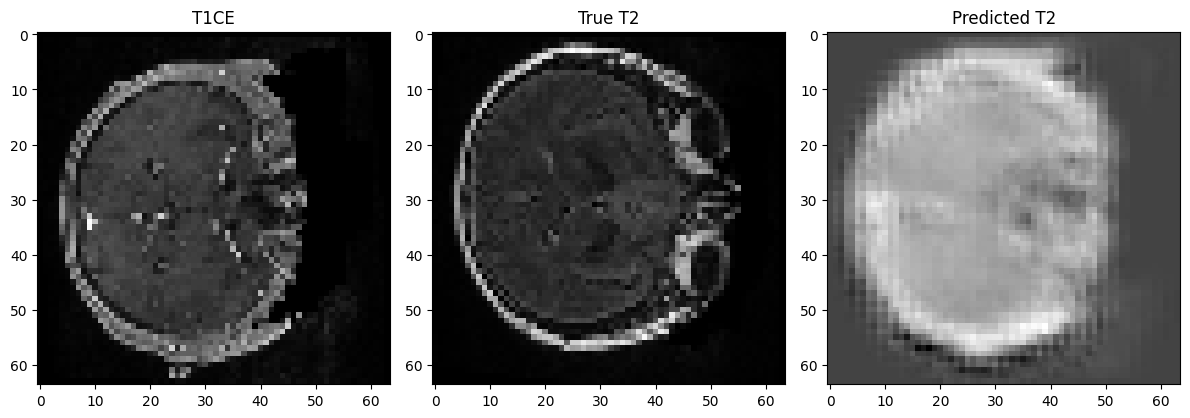

In [ ]:
pred = model.predict(sample_x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sample_x[0][:, :, 16, 0], cmap='gray')
plt.title("T1CE")

plt.subplot(1, 3, 2)
plt.imshow(sample_y[0][:, :, 16, 0], cmap='gray')
plt.title("True T2")

plt.subplot(1, 3, 3)
plt.imshow(pred[0][:, :, 16, 0], cmap='gray')
plt.title("Predicted T2")

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import nibabel as nib
from collections import defaultdict
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

nifti_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
TARGET_SHAPE = (128, 128)

def identify_modality(filename):
    name = filename.lower()
    if 'stealth' in name or 'post' in name:
        return 'T1CE'
    if 't2' in name:
        return 'T2'
    return 'UNKNOWN'

def load_nifti(path):
    img = nib.load(path).get_fdata()
    img = np.nan_to_num(img)
    img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-5)
    return img.astype(np.float32)

def resize_2d(slice_2d, target_shape=TARGET_SHAPE):
    from scipy.ndimage import zoom
    zoom_factors = [t / s for t, s in zip(target_shape, slice_2d.shape)]
    return zoom(slice_2d, zoom_factors, order=1)

# Group files
patient_files = defaultdict(dict)

for fname in os.listdir(nifti_dir):
    if not fname.endswith('.nii.gz'):
        continue
    pid = fname.split('_')[0]
    modality = identify_modality(fname)
    if modality in ['T1CE', 'T2']:
        patient_files[pid][modality] = os.path.join(nifti_dir, fname)

# Extract 2D axial slices
X_slices, Y_slices = [], []

for pid, mods in patient_files.items():
    if 'T1CE' in mods and 'T2' in mods:
        try:
            t1ce_vol = load_nifti(mods['T1CE'])
            t2_vol = load_nifti(mods['T2'])
            for z in range(min(t1ce_vol.shape[2], t2_vol.shape[2])):
                t1_slice = resize_2d(t1ce_vol[:, :, z])
                t2_slice = resize_2d(t2_vol[:, :, z])
                X_slices.append(t1_slice[..., np.newaxis])
                Y_slices.append(t2_slice[..., np.newaxis])
            print(f"✅ Sliced patient {pid}")
        except Exception as e:
            print(f"❌ Error with {pid}: {e}")

X = np.array(X_slices, dtype=np.float32)
Y = np.array(Y_slices, dtype=np.float32)

# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(100).batch(8)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(8)

print(f"✅ Total slices: {len(X)}")


✅ Sliced patient 36
✅ Sliced patient 4
✅ Sliced patient 14
✅ Total slices: 184


In [ ]:
import os
import pandas as pd

# ✅ Update metadata path to match your Google Drive structure
metadata_path = '/content/drive/MyDrive/UPENN_GBM_Top10/manifest-1669766397961/metadata.csv'
metadata_df = pd.read_csv(metadata_path)

# Step 2: Check available columns
print("📋 Metadata columns:", metadata_df.columns.tolist())

# Step 3: Extract folder names (patient IDs) from the mounted DICOM directory
dicom_dir = '/content/drive/MyDrive/UPENN_GBM_Top10/manifest-1669766397961/UPENN-GBM'
folder_names = os.listdir(dicom_dir)

# Step 4: Filter valid patient folders (ignore system files)
patient_ids = [f for f in folder_names if f.startswith('UPENN-GBM')]

# Step 5: Match with metadata's "Subject ID" column
if 'Subject ID' in metadata_df.columns:
    metadata_ids = metadata_df['Subject ID'].astype(str).tolist()
elif 'ID' in metadata_df.columns:
    metadata_ids = metadata_df['ID'].astype(str).tolist()
else:
    raise ValueError("❌ Could not find a column for patient ID in the metadata.")

# Step 6: Remove suffix from folder names like "_11" or "_21"
base_patient_ids = [pid.split('_')[0] for pid in patient_ids]
matched = [pid for pid in base_patient_ids if pid in metadata_ids]

# Step 7: Show results
print(f"✅ Matched patients: {matched}")
print(f"➡️ Total matched: {len(matched)} / {len(base_patient_ids)}")


📋 Metadata columns: ['Series UID', 'Collection', '3rd Party Analysis', 'Data Description URI', 'Subject ID', 'Study UID', 'Study Description', 'Study Date', 'Series Description', 'Manufacturer', 'Modality', 'SOP Class Name', 'SOP Class UID', 'Number of Images', 'File Size', 'File Location', 'Download Timestamp']
✅ Matched patients: ['UPENN-GBM-00302', 'UPENN-GBM-00130', 'UPENN-GBM-00280', 'UPENN-GBM-00183', 'UPENN-GBM-00314', 'UPENN-GBM-00332', 'UPENN-GBM-00160', 'UPENN-GBM-00197', 'UPENN-GBM-00344', 'UPENN-GBM-00036']
➡️ Total matched: 10 / 10


In [ ]:
!pip install pydicom


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.6 MB/s eta 0:00:00


In [ ]:
import os
from collections import defaultdict

nifti_dir = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
patient_modalities = defaultdict(set)

def is_t1ce(name):
    return any(k in name.lower() for k in ['post', 'stealth', 'mprage'])

def is_t2(name):
    return 't2' in name.lower() and 'flair' in name.lower()

# Scan filenames
for fname in os.listdir(nifti_dir):
    if fname.endswith('.nii.gz'):
        patient_id = fname.split('_')[0]
        if is_t1ce(fname):
            patient_modalities[patient_id].add('T1CE')
        if is_t2(fname):
            patient_modalities[patient_id].add('T2')

# Get only those with both
qualified_patients = [pid for pid, mods in patient_modalities.items() if {'T1CE', 'T2'}.issubset(mods)]

print(f"✅ Found {len(qualified_patients)} patients with both T1CE and T2:")
print(qualified_patients)


✅ Found 4 patients with both T1CE and T2:
['36', '2', '13', '14']


In [ ]:
base_path = '/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'
patient_ids = ['32', '33', '31', '36', '8']

for pid in patient_ids:
    print(f"\n🔍 Patient {pid}")
    for f in os.listdir(base_path):
        if f.startswith(pid):
            print(f"  - {f}")



🔍 Patient 32
  - 32_perfusion_bolus.nii.gz

🔍 Patient 33
  - 33_ax_t1_3d_post_stealth__processed_captk.nii.gz

🔍 Patient 31
  - 31_t2_axial_flair_processed_captk.nii.gz

🔍 Patient 36
  - 36_t2_axial_flair_post__processed_captk.nii.gz
  - 36_t2_axial_processed_captk.nii.gz
  - 36_perfusion_bolus.nii.gz

🔍 Patient 8
  - 8_ax_t1_mprage_isotropic_processed_captk.nii.gz
  - 8_axial_flair__processed_captk.nii.gz


In [ ]:
##TUMOUR ONSET CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np

# Load the clinical metadata (replace with your actual path)
metadata_path = '/content/drive/MyDrive/UPENN-GBM_clinical_info_v2.1 (1).csv'
metadata_df = pd.read_csv(metadata_path)

# Ensure the relevant column is numeric
metadata_df['Time_since_baseline_preop'] = pd.to_numeric(metadata_df['Time_since_baseline_preop'], errors='coerce')

# Drop rows with NaNs in required columns
metadata_df = metadata_df.dropna(subset=['ID', 'Time_since_baseline_preop'])

# Define time bins and labels
bins = [-np.inf, 0, 90, 180, 365, np.inf]  # Modify as needed
labels = ['Pre-op', '<3 months', '3-6 months', '6-12 months', '>1 year']

# Create onset class column
metadata_df['onset_class'] = pd.cut(
    metadata_df['Time_since_baseline_preop'],
    bins=bins,
    labels=labels
)

print("Labeled metadata sample:")
print(metadata_df[['ID', 'Time_since_baseline_preop', 'onset_class']].head())


Labeled metadata sample:
                   ID  Time_since_baseline_preop onset_class
0  UPENN-GBM-00001_11                        0.0      Pre-op
1  UPENN-GBM-00002_11                        0.0      Pre-op
2  UPENN-GBM-00003_11                        0.0      Pre-op
3  UPENN-GBM-00004_11                        0.0      Pre-op
4  UPENN-GBM-00005_11                        0.0      Pre-op


In [ ]:
import os

# Your filtered image samples (ensure this list contains filenames or paths)
image_patient_ids = ['UPENN-GBM-00001_11', 'UPENN-GBM-00002_11', 'UPENN-GBM-00003_11',
                     'UPENN-GBM-00004_11', 'UPENN-GBM-00005_11', 'UPENN-GBM-00006_11']  # etc.

# Filter metadata to those image IDs
metadata_filtered = metadata_df[metadata_df['ID'].isin(image_patient_ids)].copy()

# Verify results
print("Filtered metadata with onset labels:")
print(metadata_filtered[['ID', 'Time_since_baseline_preop', 'onset_class']])


Filtered metadata with onset labels:
                   ID  Time_since_baseline_preop onset_class
0  UPENN-GBM-00001_11                        0.0      Pre-op
1  UPENN-GBM-00002_11                        0.0      Pre-op
2  UPENN-GBM-00003_11                        0.0      Pre-op
3  UPENN-GBM-00004_11                        0.0      Pre-op
4  UPENN-GBM-00005_11                        0.0      Pre-op
5  UPENN-GBM-00006_11                        0.0      Pre-op


In [ ]:
# Find post-op samples (time > 0)
post_op_df = metadata_df[metadata_df['Time_since_baseline_preop'] > 0].copy()

# Bin post-op samples into onset classes
post_op_df['onset_class'] = pd.cut(
    post_op_df['Time_since_baseline_preop'],
    bins=[-1, 90, 180, 365, 10000],  # days
    labels=['<3 months', '3-6 months', '6-12 months', '>1 year']
)

# Display some samples
print(post_op_df[['ID', 'Time_since_baseline_preop', 'onset_class']].head(10))


                     ID  Time_since_baseline_preop  onset_class
36   UPENN-GBM-00036_21                      521.0      >1 year
43   UPENN-GBM-00042_21                      282.0  6-12 months
47   UPENN-GBM-00045_21                      113.0   3-6 months
54   UPENN-GBM-00051_21                      385.0      >1 year
56   UPENN-GBM-00052_21                      362.0  6-12 months
60   UPENN-GBM-00055_21                       31.0    <3 months
90   UPENN-GBM-00084_21                      151.0   3-6 months
93   UPENN-GBM-00086_21                      116.0   3-6 months
96   UPENN-GBM-00088_21                      221.0  6-12 months
102  UPENN-GBM-00093_21                      332.0  6-12 months


In [ ]:
# List all defined variables
import gc

defined_vars = [var for var in globals() if isinstance(eval(var), pd.DataFrame)]
print("Available DataFrames:", defined_vars)


Available DataFrames: ['clinical_df', 'df', 'metadata_df', 'metadata', 'subset', 'filtered_metadata', 'metadata_filtered', 'post_op_df']


In [ ]:
# Step 1: Extract pre-op patients (Time_since_baseline_preop == 0)
preop_df = metadata_df[metadata_df['Time_since_baseline_preop'] == 0].copy()
preop_df['onset_class'] = 'Pre-op'

# Step 2: Reuse existing labeled post_op_df (with onset_class from earlier)
# post_op_df is already assumed to have the onset_class column

# Step 3: Combine both into a single labeled metadata DataFrame
metadata_df_full = pd.concat([preop_df, post_op_df], axis=0).reset_index(drop=True)

# Step 4: Check final result
print("Final labeled metadata sample:")
print(metadata_df_full[['ID', 'Time_since_baseline_preop', 'onset_class']].sample(10))

# Optional: Save to CSV if needed
# metadata_df_full.to_csv('/content/drive/MyDrive/labeled_onset_metadata.csv', index=False)


Final labeled metadata sample:
                     ID  Time_since_baseline_preop  onset_class
646  UPENN-GBM-00332_21                      450.0      >1 year
355  UPENN-GBM-00356_11                        0.0       Pre-op
32   UPENN-GBM-00033_11                        0.0       Pre-op
574  UPENN-GBM-00575_11                        0.0       Pre-op
45   UPENN-GBM-00046_11                        0.0       Pre-op
251  UPENN-GBM-00252_11                        0.0       Pre-op
425  UPENN-GBM-00426_11                        0.0       Pre-op
278  UPENN-GBM-00279_11                        0.0       Pre-op
423  UPENN-GBM-00424_11                        0.0       Pre-op
630  UPENN-GBM-00148_21                      295.0  6-12 months


In [ ]:
import nibabel as nib
import os
import numpy as np

def load_modalities(patient_id, modalities=['T1CE', 'FLAIR'], base_path='/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality'):
    data = {}
    for mod in modalities:
        mod_path = os.path.join(base_path, mod, f"{patient_id}_{mod}.nii.gz")
        if os.path.exists(mod_path):
            img = nib.load(mod_path).get_fdata()
            data[mod] = img
    return data
def extract_central_slices(modality_data, slice_range=(40, 70)):
    stacked_slices = []
    for i in range(slice_range[0], slice_range[1]):
        slice_stack = []
        for mod in modality_data:
            slice_stack.append(modality_data[mod][:, :, i])
        stacked_slices.append(np.stack(slice_stack, axis=-1))  # (H, W, C)
    return stacked_slices  # List of (H, W, C)


from tensorflow.keras.utils import to_categorical

def create_dataset(metadata_df, label_encoder, slice_range=(40, 70)):
    images, labels = [], []
    for _, row in metadata_df.iterrows():
        patient_id = row['ID']
        label = row['onset_class']
        try:
            modality_data = load_modalities(patient_id.split('_')[0])
            slices = extract_central_slices(modality_data, slice_range)
            images.extend(slices)
            labels.extend([label_encoder[label]] * len(slices))
        except Exception as e:
            print(f"Failed for {patient_id}: {e}")
    return np.array(images), to_categorical(labels)


label_map = {'Pre-op': 0, '<3 months': 1, '3-6 months': 2, '6-12 months': 3, '>1 year': 4}


In [ ]:
import os

# Define the root directory containing all NIfTI files
nifti_dir = "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality"
all_files = os.listdir(nifti_dir)

# Extract sample IDs
sample_ids = ['UPENN-GBM-00001', 'UPENN-GBM-00002', 'UPENN-GBM-00003', 'UPENN-GBM-00004',
              'UPENN-GBM-00005', 'UPENN-GBM-00006', 'UPENN-GBM-00007', 'UPENN-GBM-00008',
              'UPENN-GBM-00009', 'UPENN-GBM-00010']

# Match based on filename prefixes
valid_samples = []
for sid in sample_ids:
    patient_num = sid.split('-')[-1].lstrip('0')  # e.g., '00001' → '1'

    # Find files for this patient
    patient_files = [f for f in all_files if f.startswith(patient_num + "_") or f.startswith(patient_num + "-") or f.startswith(patient_num)]

    # Detect T1CE and T2/FLAIR from filenames
    t1ce_file = next((f for f in patient_files if 'post' in f.lower() and 't1' in f.lower()), None)
    t2_file = next((f for f in patient_files if 'flair' in f.lower() or ('t2' in f.lower() and 'tse' not in f.lower())), None)

    if t1ce_file and t2_file:
        valid_samples.append({
            'ID': sid,
            't1ce_path': os.path.join(nifti_dir, t1ce_file),
            't2_path': os.path.join(nifti_dir, t2_file)
        })

print(f"✅ Found {len(valid_samples)} patients with both T1CE and T2/FLAIR:")
for vs in valid_samples:
    print(vs['ID'], "→", os.path.basename(vs['t1ce_path']), "|", os.path.basename(vs['t2_path']))


✅ Found 3 patients with both T1CE and T2/FLAIR:
UPENN-GBM-00001 → 16_t1_axial_stealth-post__processed_captk.nii.gz | 11_axial_t2_flair_processed_captk.nii.gz
UPENN-GBM-00003 → 33_ax_t1_3d_post_stealth__processed_captk.nii.gz | 31_t2_axial_flair_processed_captk.nii.gz
UPENN-GBM-00004 → 46_ax_t1_3d_post_stealth__processed_captk.nii.gz | 44_t2_axial_flair_processed_captk.nii.gz


In [ ]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --------------------- Step 1: Setup --------------------- #

# Ensure numeric type (will turn invalid strings into NaN if any)
df['Time_since_baseline_preop'] = pd.to_numeric(df['Time_since_baseline_preop'], errors='coerce')

# Then apply the onset classification
df['onset_class'] = df['Time_since_baseline_preop'].apply(label_onset)

def label_onset(val):
    if val == 0:
        return 'Pre-op'
    elif val <= 90:
        return '<3 months'
    elif val <= 180:
        return '3-6 months'
    elif val <= 365:
        return '6-12 months'
    else:
        return '>1 year'

# Apply it directly to the column
df['onset_class'] = df['Time_since_baseline_preop'].apply(label_onset)


# Use the confirmed patient matches
valid_samples = [
    {
        "ID": "UPENN-GBM-00001",
        "t1ce_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/16_t1_axial_stealth-post__processed_captk.nii.gz",
        "flair_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/11_axial_t2_flair_processed_captk.nii.gz"
    },
    {
        "ID": "UPENN-GBM-00003",
        "t1ce_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/33_ax_t1_3d_post_stealth__processed_captk.nii.gz",
        "flair_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/31_t2_axial_flair_processed_captk.nii.gz"
    },
    {
        "ID": "UPENN-GBM-00004",
        "t1ce_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/46_ax_t1_3d_post_stealth__processed_captk.nii.gz",
        "flair_path": "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality/44_t2_axial_flair_processed_captk.nii.gz"
    }
]

combined_metadata = df.copy()
combined_metadata['base_id'] = combined_metadata['ID'].apply(lambda x: x.split('_')[0])

label_map = {'Pre-op': 0, '<3 months': 1, '3-6 months': 2, '6-12 months': 3, '>1 year': 4}

# --------------------- Step 2: Load Modalities & Extract Slices --------------------- #

def load_modalities_and_slices(t1ce_path, flair_path, slice_range=(40, 70), target_size=(128, 128)):
    t1ce_img = nib.load(t1ce_path).get_fdata()
    flair_img = nib.load(flair_path).get_fdata()

    #Getting the minimum depth to avoid IndexErrors
    min_depth = min(t1ce_img.shape[2], flair_img.shape[2])
    end_slice = min(slice_range[1], min_depth)

    slices = []
    for i in range(slice_range[0], end_slice):
        t1ce_slice = t1ce_img[:, :, i]
        flair_slice = flair_img[:, :, i]

        if not np.any(t1ce_slice) or not np.any(flair_slice):
            continue

        #Resize each to 128x128
        t1ce_resized = tf.image.resize(t1ce_slice[..., np.newaxis], target_size).numpy().squeeze()
        flair_resized = tf.image.resize(flair_slice[..., np.newaxis], target_size).numpy().squeeze()

        combined = np.stack([t1ce_resized, flair_resized], axis=-1)
        slices.append(combined)

    return slices


X = []
y = []

for sample in valid_samples:
    base_id = sample['ID']
    onset_label = combined_metadata[combined_metadata['base_id'] == base_id]['onset_class'].values[0]

    slices = load_modalities_and_slices(sample['t1ce_path'], sample['flair_path'])
    X.extend(slices)
    y.extend([label_map[onset_label]] * len(slices))

X = np.array(X)
y = np.array(y)

# ------------------- Step 3: Normalize and Resize ------------------- #

print("X shape before resize:", X.shape)

X = (X - np.min(X)) / (np.max(X) - np.min(X) + 1e-5)
X = tf.image.resize(X, [128, 128]).numpy()


from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=5)


# -------------------- Step 4: Train-Test Split -------------------- #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# --------------------- Step 5: CNN Model --------------------- #

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 2)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------- Step 6: Train & Evaluate --------------------- #

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report

print(classification_report(
    y_true_classes,
    y_pred_classes,
    labels=[0, 1, 2, 3, 4],  #Expected class indices
    target_names=list(label_map.keys()),
    zero_division=0          #Avoiding divide-by-zero for missing classes
))



X shape before resize: (57, 128, 128, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 126, 126, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,997 (12.61 MB)

 Trainable params: 3,304,997 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 343ms/step - accuracy: 0.5301 - loss: 1.0339 - val_accuracy: 1.0000 - val_loss: 8.2701e-06
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 1.0000 - loss: 4.8803e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
              precision    recall  f1-score   support

      Pre-op       1.00      1.00      1.00        18
   <3 months       0.00      0.00      0.00         0
  3-6 months       0.00      0.00      0.00         0
 6-12 months       0.00      0.00      0.00         0
     >1 year       0.00      0.00      0.00         0

    accuracy                           1.00        18
   macro avg       0.20      0.20      0.20        18
weighted avg       1.00      1.00      1.00        18



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
✅ True label: Pre-op
🎯 Predicted label: Pre-op


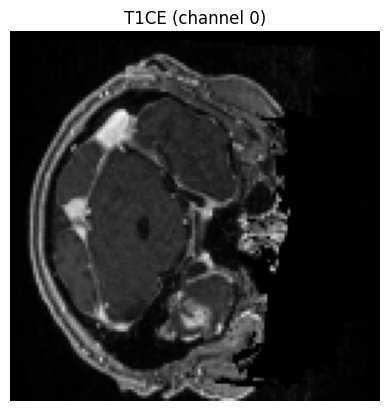

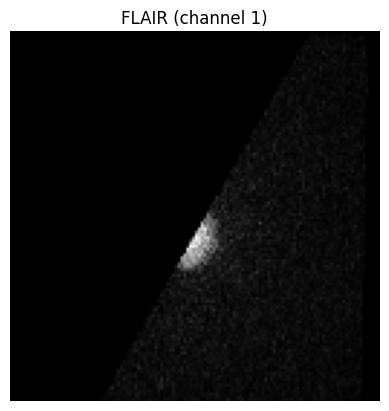

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def predict_random_slice(X, y, model, label_map):
    inverse_label_map = {v: k for k, v in label_map.items()}

    idx = random.randint(0, len(X) - 1)
    sample = X[idx]
    true_label = np.argmax(y[idx])
    pred = model.predict(np.expand_dims(sample, axis=0))
    pred_class = np.argmax(pred)

    #Result
    print(f"✅ True label: {inverse_label_map[true_label]}")
    print(f"🎯 Predicted label: {inverse_label_map[pred_class]}")

    #Show slice
    plt.imshow(sample[:, :, 0], cmap='gray')
    plt.title("T1CE (channel 0)")
    plt.axis("off")
    plt.show()

    plt.imshow(sample[:, :, 1], cmap='gray')
    plt.title("FLAIR (channel 1)")
    plt.axis("off")
    plt.show()

predict_random_slice(X, y, model, label_map)


In [ ]:
##TUMOUR DETERIORATION CLASSIFICATION

In [ ]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --------------------- Load Metadata --------------------- #
metadata_path = "/content/drive/MyDrive/UPENN-GBM_clinical_info_v2.1 (1).csv"
df = pd.read_csv(metadata_path)
df = df[['ID', 'PsP_TP_score', 'Time_since_baseline_preop']]
df = df[df['PsP_TP_score'].notna()]  # Filter out patients without labels
df['PsP_TP_score'] = df['PsP_TP_score'].astype(int)
df['base_id'] = df['ID'].apply(lambda x: x.split('_')[0])

# --------------------- Match Image Files --------------------- #
nifti_folder = "/content/drive/MyDrive/UPENN_GBM_Top10_NIfTI_Converted_Modality"
all_files = os.listdir(nifti_folder)
t1ce_files = [f for f in all_files if 't1' in f.lower() and 'post' in f.lower()]
t2_flair_files = [f for f in all_files if 'flair' in f.lower()]

image_matches = []
for _, row in df.iterrows():
    pid = row['base_id']
    t1ce = [f for f in t1ce_files if f.startswith(pid)]
    flair = [f for f in t2_flair_files if f.startswith(pid)]
    if t1ce and flair:
        image_matches.append({
            'base_id': pid,
            't1ce_path': os.path.join(nifti_folder, t1ce[0]),
            'flair_path': os.path.join(nifti_folder, flair[0])
        })

# --------------------- Load Images --------------------- #
def load_modalities_and_slices(t1ce_path, flair_path, slice_range=(20, 50), target_size=(128, 128)):
    t1ce_img = nib.load(t1ce_path).get_fdata()
    flair_img = nib.load(flair_path).get_fdata()
    t1ce_img = np.nan_to_num(t1ce_img)
    flair_img = np.nan_to_num(flair_img)
    slices = []
    for i in range(slice_range[0], min(slice_range[1], t1ce_img.shape[2], flair_img.shape[2])):
        t1ce_slice = t1ce_img[:, :, i]
        flair_slice = flair_img[:, :, i]
        if t1ce_slice.shape != flair_slice.shape:
            continue
        combined = np.stack([t1ce_slice, flair_slice], axis=-1)
        combined = tf.image.resize(combined, target_size).numpy()
        slices.append(combined)
    return slices

X = []
y = []
for sample in image_matches:
    base_id = sample['base_id']
    label = df[df['base_id'] == base_id]['PsP_TP_score'].values[0]
    slices = load_modalities_and_slices(sample['t1ce_path'], sample['flair_path'])
    X.extend(slices)
    y.extend([label] * len(slices))

X = np.array(X)
y = np.array(y)

# --------------------- Preprocess --------------------- #
X = (X - X.min()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --------------------- Build Model --------------------- #
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 2)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------- Train & Evaluate --------------------- #
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

print("\nClassification Report for Tumor Deterioration Prediction:")
print(classification_report(y_test, y_pred_classes, target_names=["PsP", "TP"]))


ValueError: zero-size array to reduction operation minimum which has no identity